In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:\Data Science\Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data['chas'].isnull().sum()

0

In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
data.shape

(506, 14)

In [7]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [8]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
y = data['medv']
X = data.drop('medv',axis=1)

In [10]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

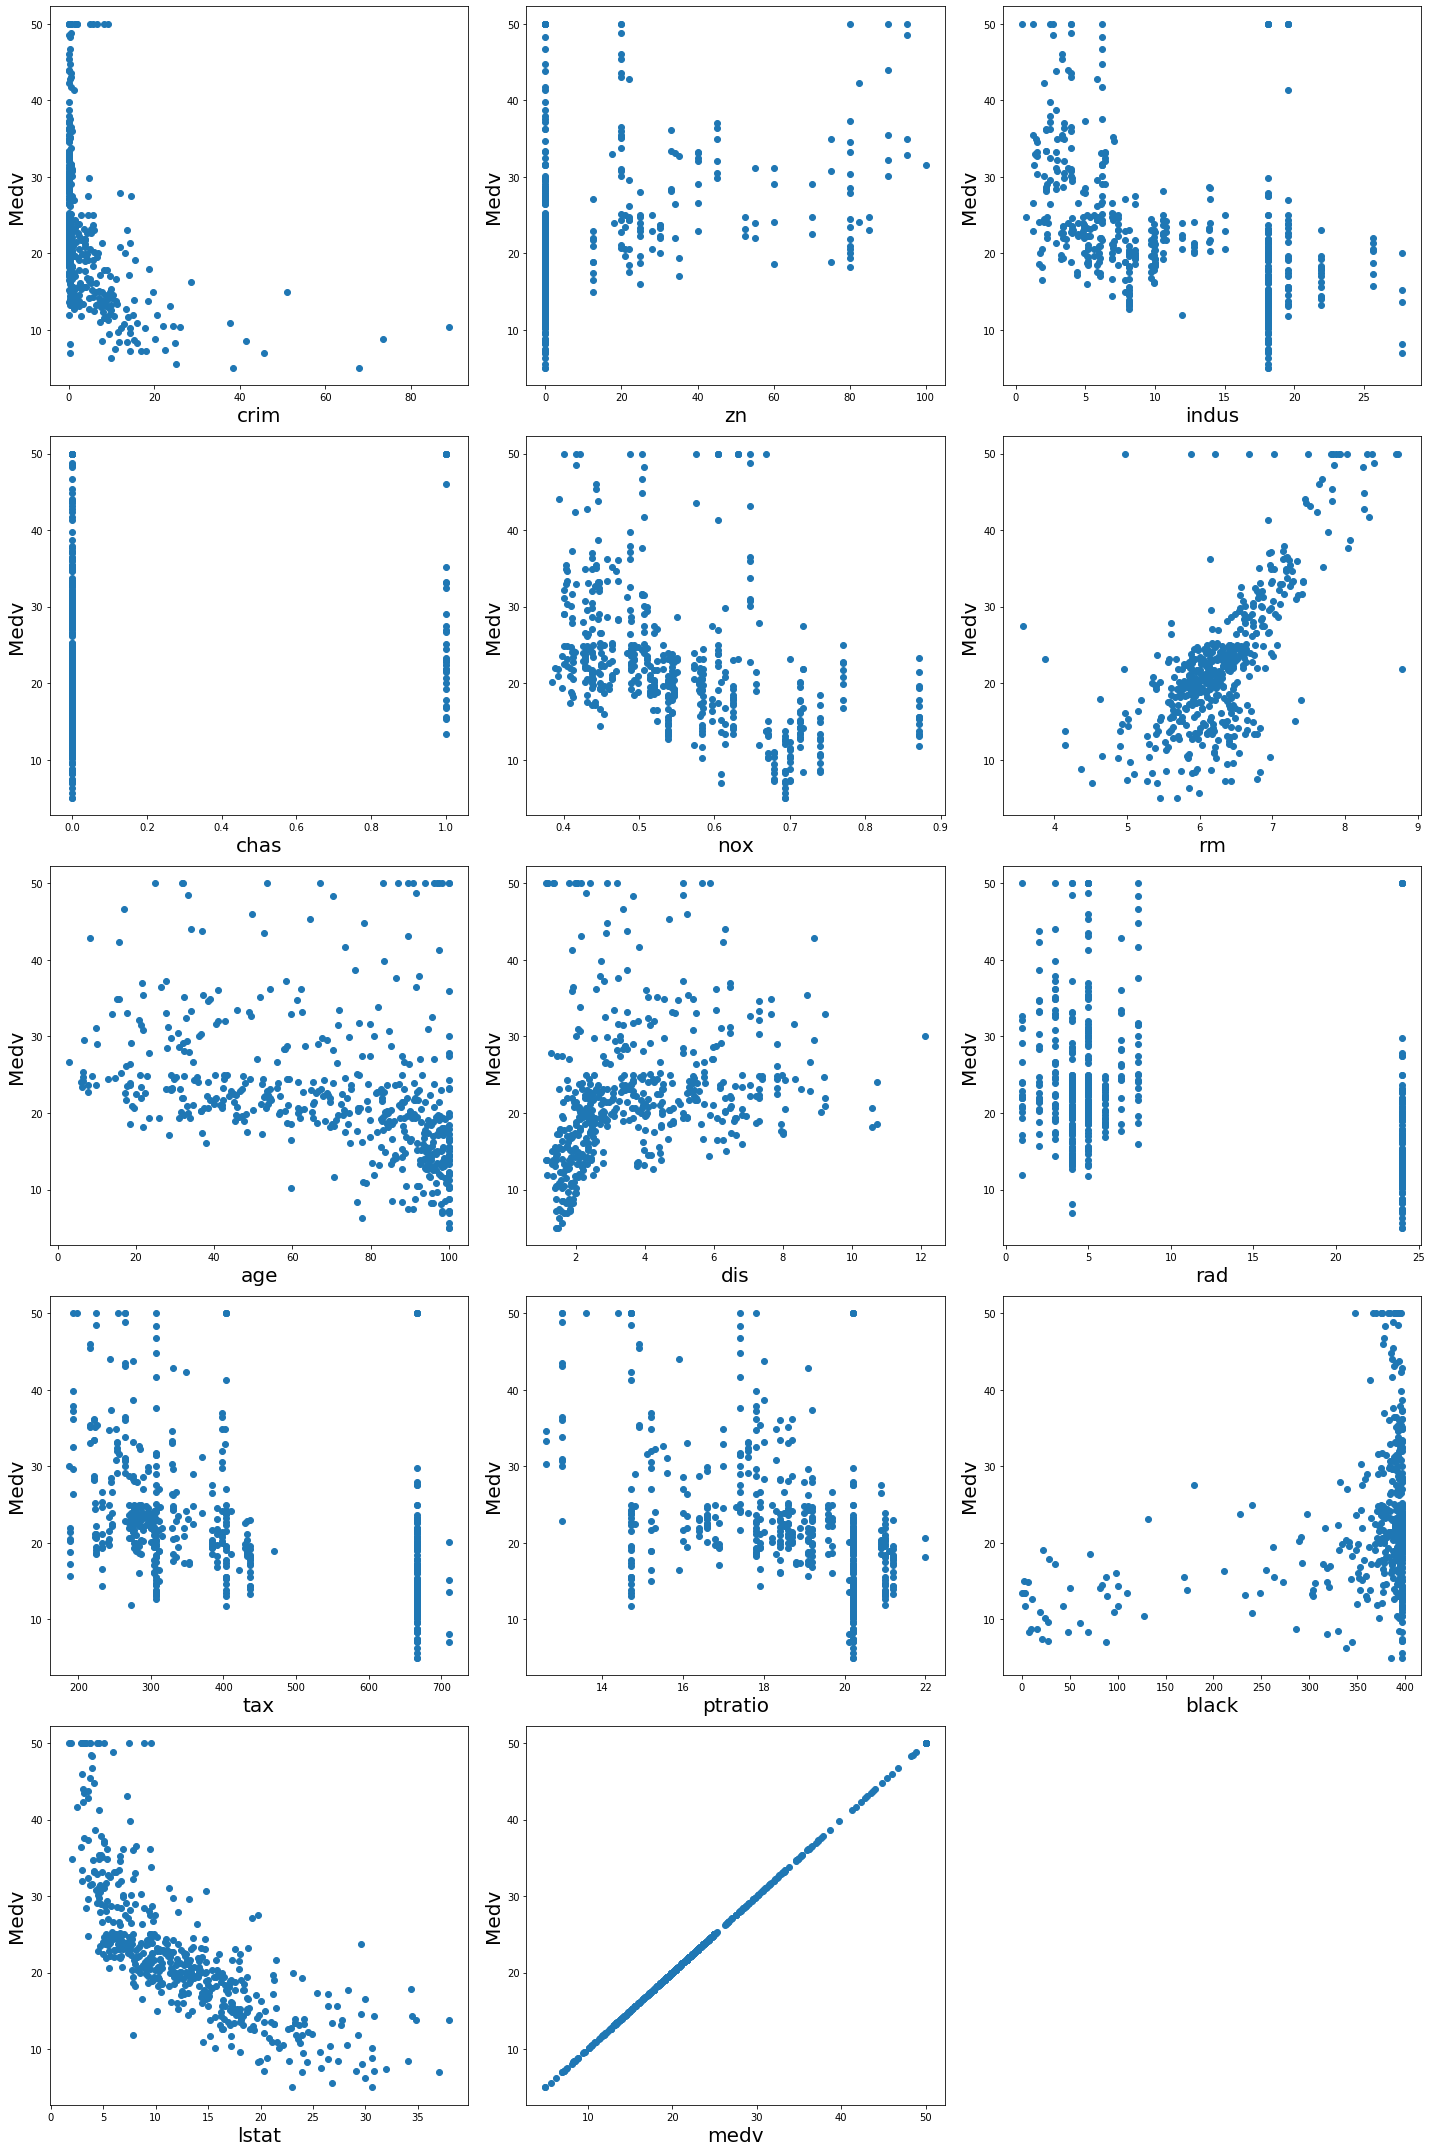

In [11]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(data[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Medv',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [13]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [14]:
data1 = data[(z < 3).all(axis=1)]

In [15]:
data1.shape

(415, 14)

In [16]:
y1 = data1['medv']
X1 = data1.drop('medv',axis=1)

C:\Users\Lenovo\Anaconda4\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


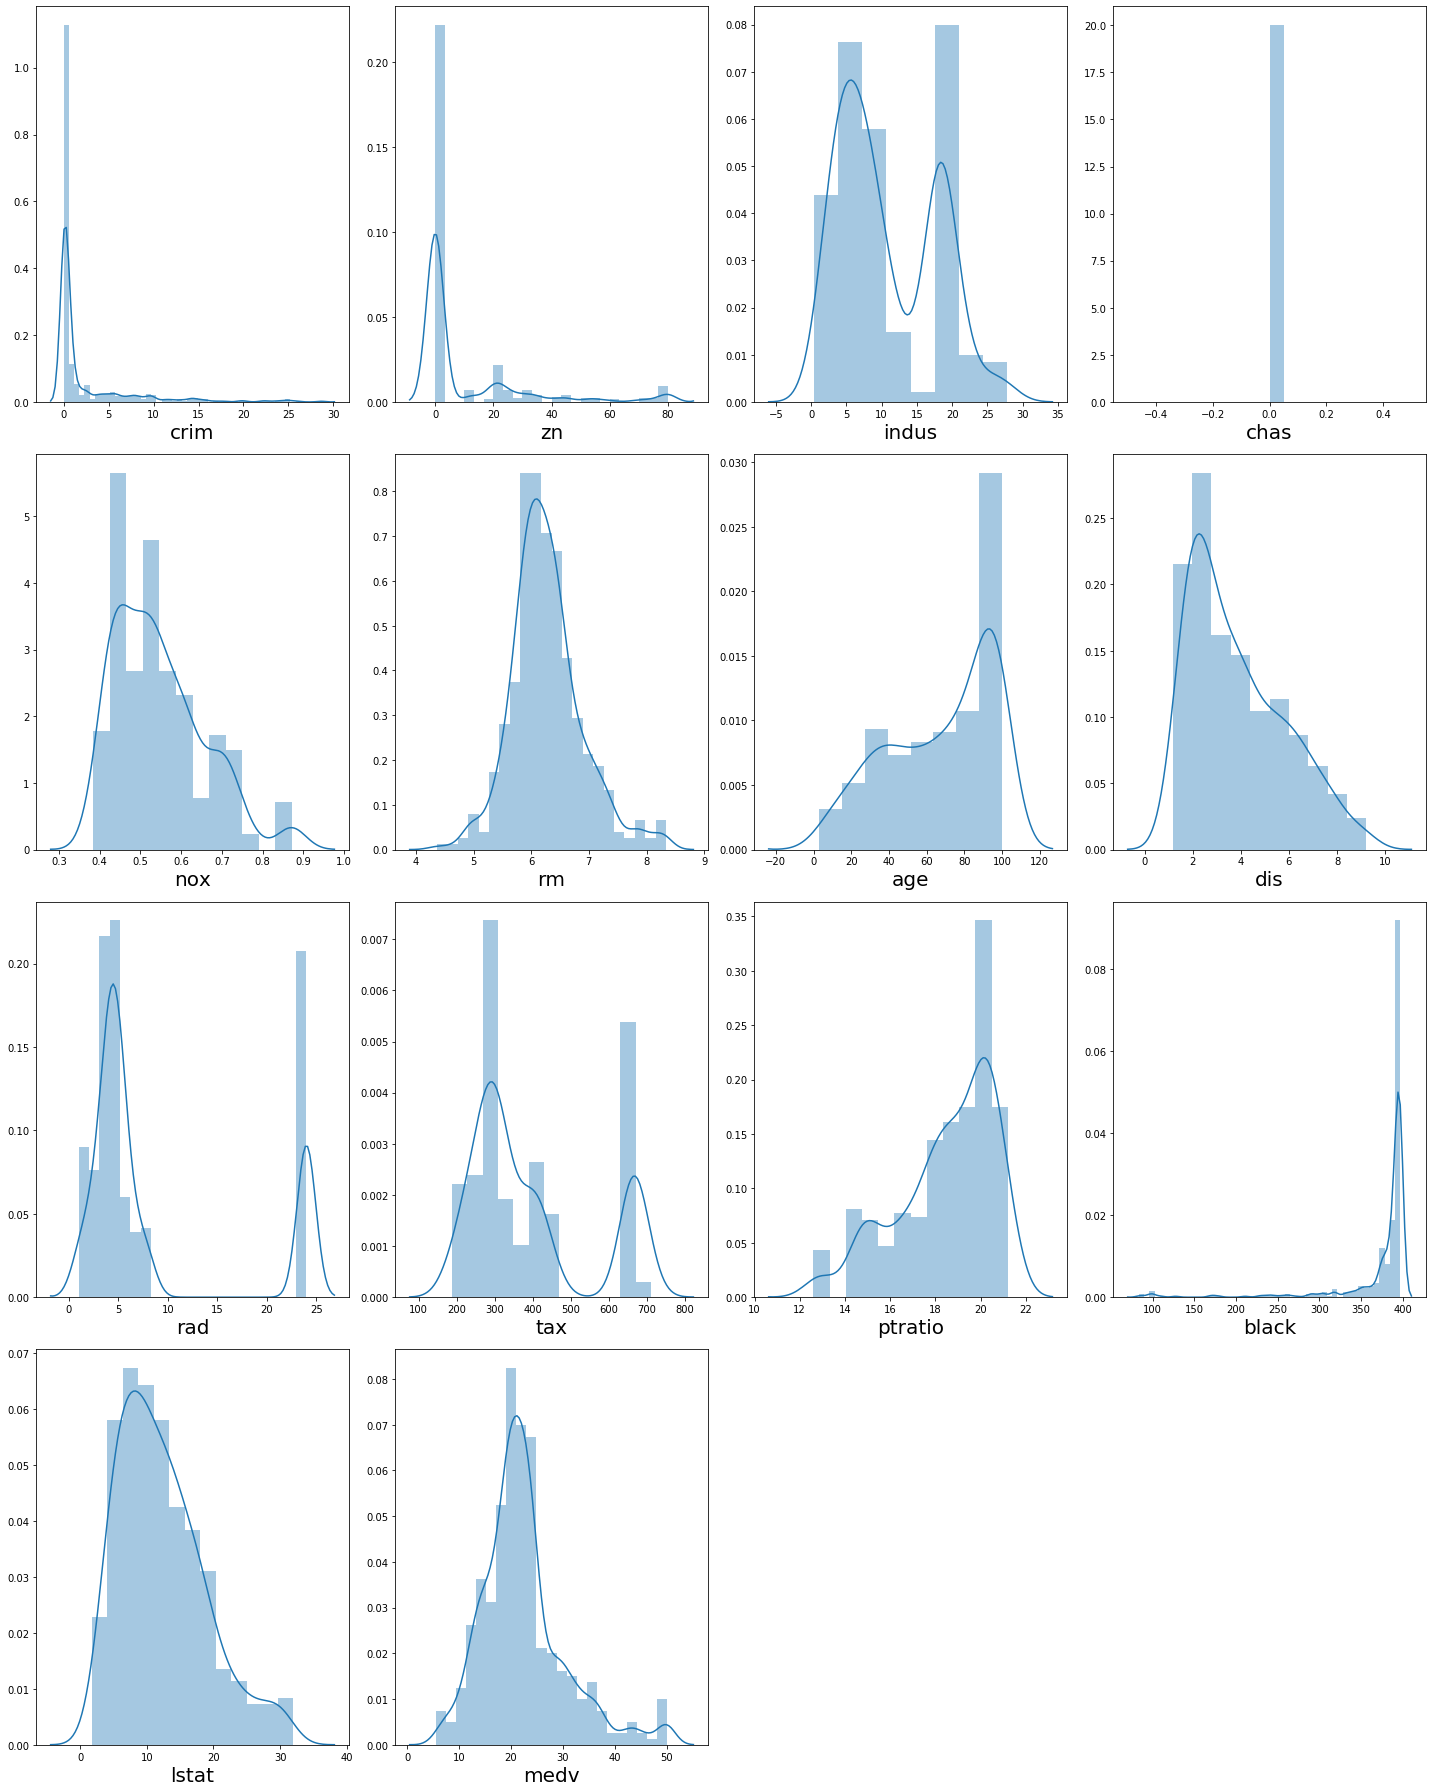

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
data1['log_crim'] = np.log(data1['crim'])
data1['cuber_zn'] = np.power((data1['zn']),1/3)
data1['log_nox'] = np.log(data1['nox'])
data1['sq_age'] = np.power((data1['age']),2)
data1['log_dis'] = np.log(data1['dis'])
data1['4_ptratio'] = np.power((data1['ptratio']),4)
data1['50_black'] = np.power((data1['black']),50)

C:\Users\Lenovo\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lenovo\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [19]:
data1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,black,lstat,medv,log_crim,cuber_zn,log_nox,sq_age,log_dis,4_ptratio,50_black
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,396.90,4.98,24.0,-5.064036,2.620741,-0.619897,4251.04,1.408545,54798.1281,8.591222e+129
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,396.90,9.14,21.6,-3.600502,0.000000,-0.757153,6225.21,1.602836,100387.5856,8.591222e+129
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,392.83,4.03,34.7,-3.601235,0.000000,-0.757153,3733.21,1.602836,100387.5856,5.131358e+129
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,394.63,2.94,33.4,-3.430523,0.000000,-0.780886,2097.64,1.802073,122283.0961,6.449186e+129
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,396.90,5.33,36.2,-2.672924,0.000000,-0.780886,2937.64,1.802073,122283.0961,8.591222e+129


In [20]:
data1.drop(['crim','zn','nox','age','dis','ptratio','black'],axis=1,inplace=True)

C:\Users\Lenovo\Anaconda4\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
data1.shape

(415, 14)

C:\Users\Lenovo\Anaconda4\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda4\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


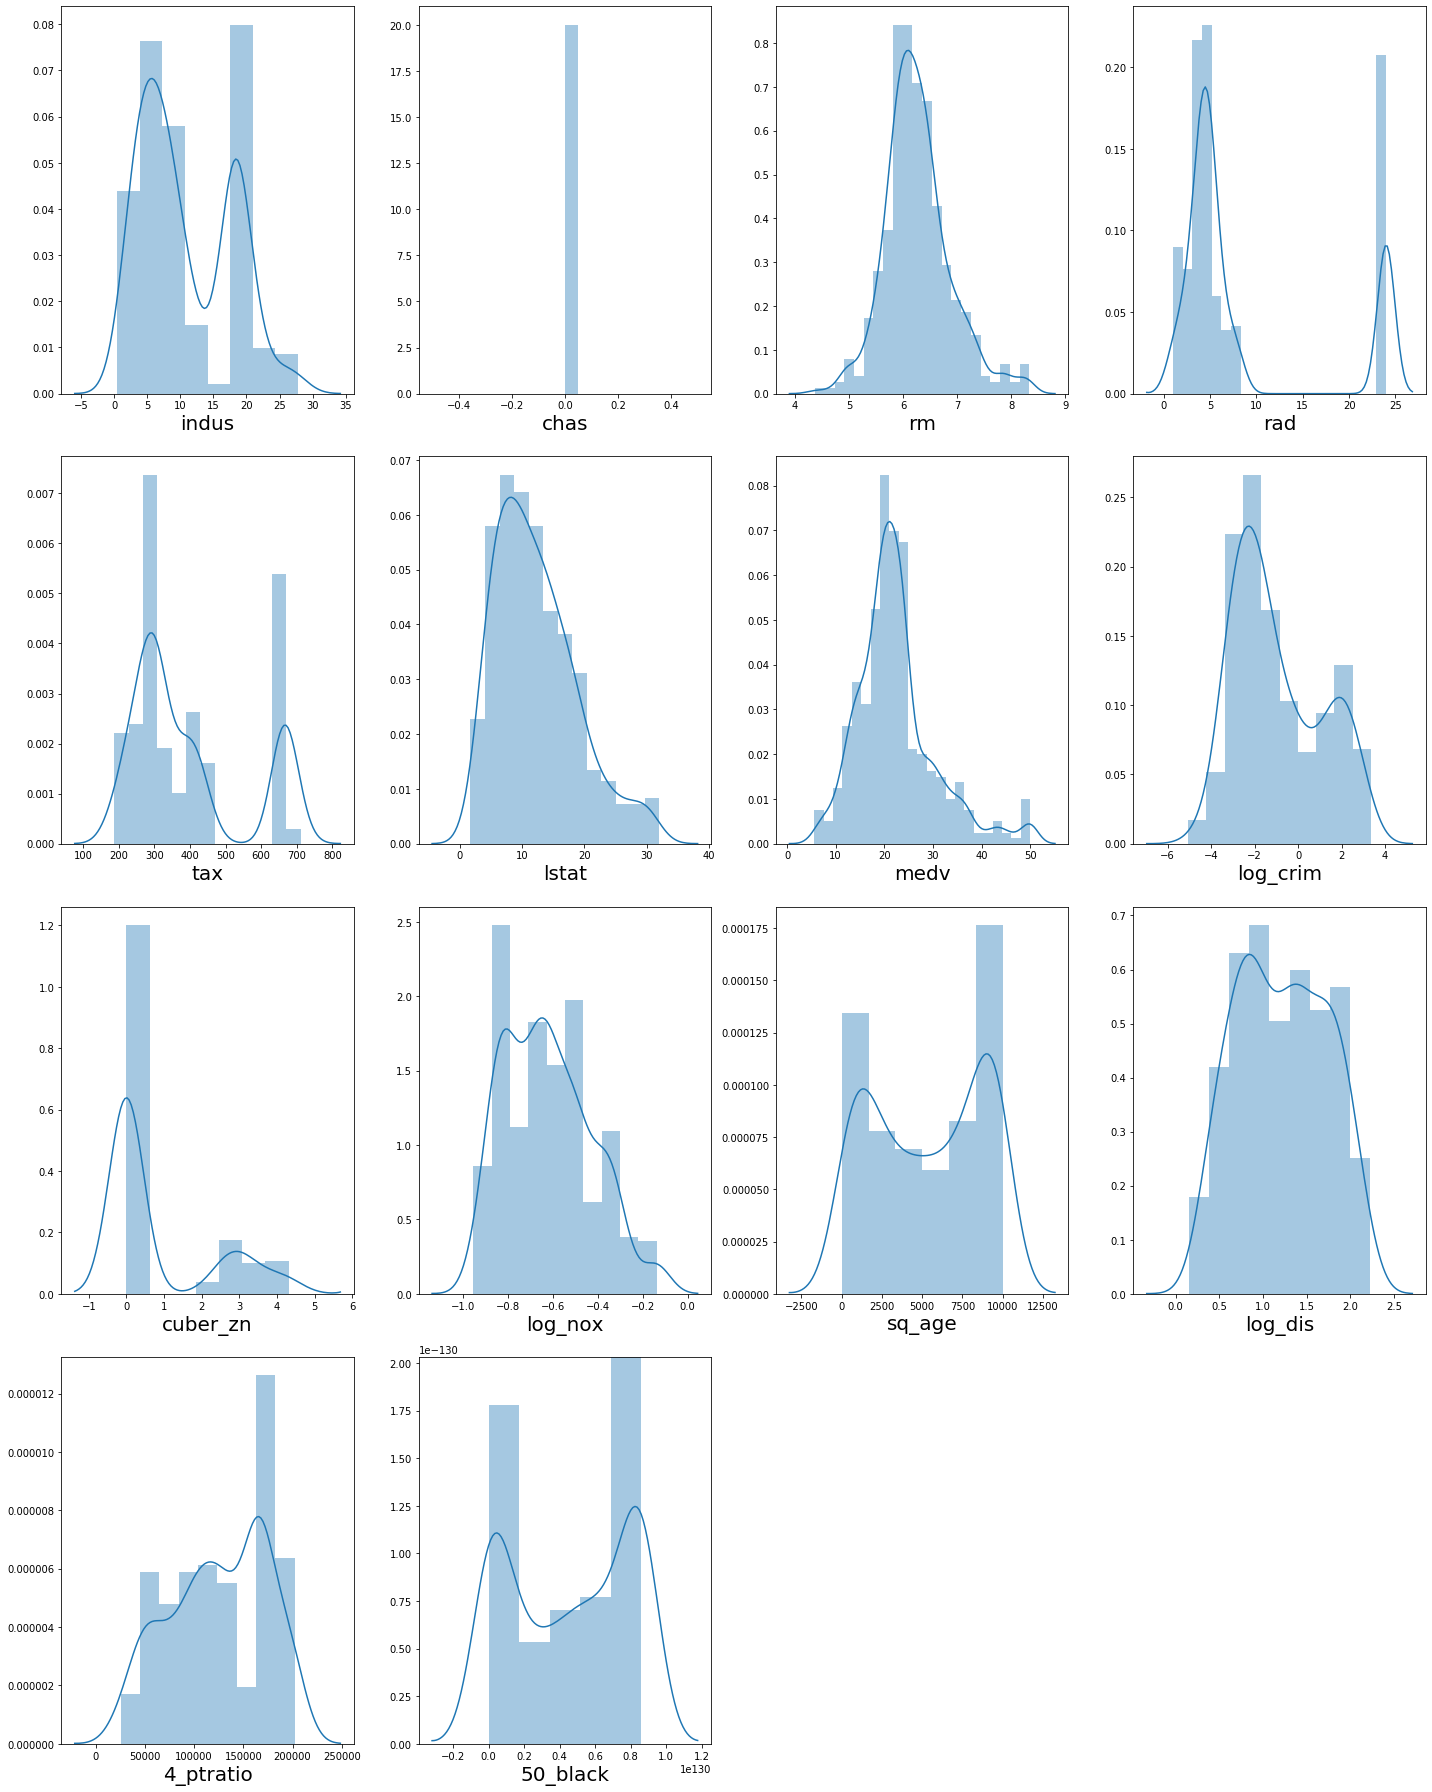

In [22]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [23]:
out = data1['medv']
inp = data1.drop('medv',axis=1)
inp.head()

,indus,chas,rm,rad,tax,lstat,log_crim,cuber_zn,log_nox,sq_age,log_dis,4_ptratio,50_black
0,2.31,0,6.575,1,296,4.98,-5.064036,2.620741,-0.619897,4251.04,1.408545,54798.1281,8.591222e+129
1,7.07,0,6.421,2,242,9.14,-3.600502,0.000000,-0.757153,6225.21,1.602836,100387.5856,8.591222e+129
2,7.07,0,7.185,2,242,4.03,-3.601235,0.000000,-0.757153,3733.21,1.602836,100387.5856,5.131358e+129
3,2.18,0,6.998,3,222,2.94,-3.430523,0.000000,-0.780886,2097.64,1.802073,122283.0961,6.449186e+129
4,2.18,0,7.147,3,222,5.33,-2.672924,0.000000,-0.780886,2937.64,1.802073,122283.0961,8.591222e+129


In [24]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
inp_scaled = scaler.fit_transform(inp)

C:\Users\Lenovo\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lenovo\Anaconda4\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = inp_scaled
vif = pd.DataFrame() 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = inp.columns

C:\Users\Lenovo\Anaconda4\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [26]:
vif

,VIF,Features
0,3.587426,indus
1,NaN,chas
2,2.025007,rm
3,8.535715,rad
4,7.320031,tax
5,3.114736,lstat
6,7.068920,log_crim
7,1.997455,cuber_zn
8,6.044298,log_nox
9,3.578487,sq_age


In [27]:
X2 = inp.drop(['rad','tax','log_crim','chas'],axis=1)
y2 = out

In [28]:
X2.head()

,indus,rm,lstat,cuber_zn,log_nox,sq_age,log_dis,4_ptratio,50_black
0,2.31,6.575,4.98,2.620741,-0.619897,4251.04,1.408545,54798.1281,8.591222e+129
1,7.07,6.421,9.14,0.000000,-0.757153,6225.21,1.602836,100387.5856,8.591222e+129
2,7.07,7.185,4.03,0.000000,-0.757153,3733.21,1.602836,100387.5856,5.131358e+129
3,2.18,6.998,2.94,0.000000,-0.780886,2097.64,1.802073,122283.0961,6.449186e+129
4,2.18,7.147,5.33,0.000000,-0.780886,2937.64,1.802073,122283.0961,8.591222e+129


In [71]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [259]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(X2_scaled,y2,test_size = 0.2,random_state=102)

In [260]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [261]:
regression.score(x2_train,y2_train)

0.7404417901518565

In [262]:
regression.score(x2_test,y2_test)

0.7124151961774537

In [263]:
adj_r2(x2_train,y2_train)

0.7331870575784611

In [264]:
adj_r2(x2_test,y2_test)

0.6769595354322083

In [265]:
y2_pred = regression.predict(x2_test)
y2_pred

array([27.81346386, 11.34083975, 16.5564658 , 18.08676   , 18.76831437,
       19.78641235, 23.5638319 , 32.52390292, 11.23254355, 26.65278567,
       37.8445285 , 19.33922874, 24.72338117, 24.15655396, 21.1954607 ,
       24.09989174,  4.54020521, 20.34484191, 23.4540365 , 20.33087628,
       22.79960728, 28.89653559, 11.1063147 , 22.88203992, 29.61113068,
       26.81171459,  5.05175438, 17.59210086, 19.28960389, 21.75024007,
       19.9429036 ,  6.18413898, 26.45943076, 31.45327201, 21.71037783,
       17.66580445, 25.34377213, 22.21465516, 17.02760767, 21.6679436 ,
        9.26089396, 21.90708657, 16.64833399, 28.44400369, 17.12502403,
       16.65873381, 12.62188081, 31.77805844, 33.44676892, 12.59559102,
       17.19189525, 21.30757703, 20.60625039, 26.08903566, 12.47170228,
       22.17140863, 30.29479987, 18.97776204, 19.33608341, 35.48839792,
       17.49698306, 12.28387851, 21.01725828, 31.58427176, 24.17343874,
       18.9694595 , 25.17940794, 15.72168801, 32.4675394 , 24.37

In [266]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y2_test, y2_pred))
rms

3.8856383648611112

In [267]:
print(regression.coef_)

[-0.98502031  2.88194573 -3.88396594 -0.14202076 -1.13700042 -0.50969434
 -2.85989975 -1.73686104 -0.52568902]


In [268]:
print(regression.intercept_)

22.442068640472417


In [269]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [270]:

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x2_train, y2_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [271]:
elasticCV.alpha_

0.04843462744391833

In [272]:
elasticCV.l1_ratio

0.5

In [273]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x2_train, y2_train)

ElasticNet(alpha=0.04843462744391833, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [274]:
elasticnet_reg.score(x2_test, y2_test)

0.7122013565291436